In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Earlier having around 5LAC rows, after sampling having around 1.33LAC rows:
df = pd.read_csv("/Users/shailesh/Desktop/00 Python/train_indessa.csv").sample(frac=.35,random_state=0).reset_index()
df = df.drop(["index"],axis=1)
pd.set_option('max_columns',500)
pd.set_option('max_rows',500)
print(df.shape)
df.head()

(186350, 43)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,42802624,5000,5000,5000.0,36 months,BAT4694572,13.66,C,C3,1 year,RENT,43000.0,Source Verified,n,NaN,other,144xx,NY,11.47,0.0,1.0,71.0,NaN,14.0,0.0,1782.0,13.9,17.0,w,553.87,0.0,0.0,0.0,0.0,71.0,INDIVIDUAL,NaN,52th week,0.0,0.0,23756.0,12800.0,0
1,2631928,5800,5800,5800.0,36 months,BAT5547201,14.33,C,C1,2 years,RENT,62550.0,Not Verified,n,> Hi like a lot of people I have too many c...,credit_card,927xx,CA,3.32,1.0,0.0,5.0,NaN,8.0,0.0,4901.0,30.8,20.0,f,267.48,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,4901.0,15900.0,1
2,46576841,6000,6000,6000.0,36 months,NaN,9.99,B,B3,NaN,MORTGAGE,55648.1,Verified,n,NaN,home_improvement,484xx,MI,34.35,2.0,0.0,16.0,116.0,7.0,1.0,4540.0,69.8,18.0,f,441.15,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44th week,0.0,0.0,284655.0,6500.0,0
3,59712869,16500,16500,16500.0,60 months,BAT1780517,12.29,C,C1,3 years,MORTGAGE,50000.0,Verified,n,NaN,debt_consolidation,350xx,AL,4.08,2.0,0.0,15.0,NaN,13.0,0.0,425.0,7.9,30.0,w,812.92,0.0,0.0,0.0,0.0,32.0,INDIVIDUAL,NaN,22th week,0.0,0.0,233143.0,5400.0,0
4,17842960,29900,29900,29900.0,60 months,BAT2136391,17.57,D,D2,5 years,MORTGAGE,65000.0,Not Verified,n,NaN,debt_consolidation,477xx,IN,30.59,1.0,0.0,4.0,NaN,14.0,0.0,37031.0,75.8,42.0,w,7798.91,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87th week,0.0,0.0,203017.0,45600.0,0


In [2]:
#Removing unwanted column from dataset:
df.drop(["member_id", "batch_enrolled"],axis=1,inplace=True)
df.shape

(186350, 41)

In [3]:
'''1.Data Cleaning'''

df["term"].replace(to_replace=" months", value='', regex=True, inplace=True)
df["term"]=pd.to_numeric(df["term"], errors="coerce")

'''
df["sub_grade"].replace(to_replace="A", value=0, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="B", value=1, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="C", value=2, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="D", value=3, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="E", value=4, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="F", value=5, regex=True, inplace=True)
df["sub_grade"].replace(to_replace="G", value=6, regex=True, inplace=True)
df["sub_grade"]=pd.to_numeric(df["sub_grade"], errors="coerce")
'''

df["emp_length"].replace("n/a", 0, inplace=True)
df["emp_length"].replace(to_replace="\+ years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" years", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace=" year", value='', regex=True, inplace=True)
df["emp_length"].replace(to_replace="< 1", value= 0, regex=True, inplace=True)
df["emp_length"]=pd.to_numeric(df["emp_length"], errors="coerce")

df["verification_status"].replace(to_replace="Source ",value='',regex=True, inplace=True)

df["zip_code"].replace(to_replace="xx", value='', regex=True, inplace=True)
df["zip_code"]=pd.to_numeric(df["zip_code"], errors="coerce")

df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df['last_week_pay'] = pd.to_numeric(df['last_week_pay'], errors='coerce')

print('Transformation Done')
print(df.shape)
df.head()

Transformation Done
(186350, 41)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,5000,5000,5000.0,36,13.66,C,C3,1.0,RENT,43000.0,Verified,n,NaN,other,144,NY,11.47,0.0,1.0,71.0,NaN,14.0,0.0,1782.0,13.9,17.0,w,553.87,0.0,0.0,0.0,0.0,71.0,INDIVIDUAL,NaN,52.0,0.0,0.0,23756.0,12800.0,0
1,5800,5800,5800.0,36,14.33,C,C1,2.0,RENT,62550.0,Not Verified,n,> Hi like a lot of people I have too many c...,credit_card,927,CA,3.32,1.0,0.0,5.0,NaN,8.0,0.0,4901.0,30.8,20.0,f,267.48,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,22.0,0.0,0.0,4901.0,15900.0,1
2,6000,6000,6000.0,36,9.99,B,B3,NaN,MORTGAGE,55648.1,Verified,n,NaN,home_improvement,484,MI,34.35,2.0,0.0,16.0,116.0,7.0,1.0,4540.0,69.8,18.0,f,441.15,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,44.0,0.0,0.0,284655.0,6500.0,0
3,16500,16500,16500.0,60,12.29,C,C1,3.0,MORTGAGE,50000.0,Verified,n,NaN,debt_consolidation,350,AL,4.08,2.0,0.0,15.0,NaN,13.0,0.0,425.0,7.9,30.0,w,812.92,0.0,0.0,0.0,0.0,32.0,INDIVIDUAL,NaN,22.0,0.0,0.0,233143.0,5400.0,0
4,29900,29900,29900.0,60,17.57,D,D2,5.0,MORTGAGE,65000.0,Not Verified,n,NaN,debt_consolidation,477,IN,30.59,1.0,0.0,4.0,NaN,14.0,0.0,37031.0,75.8,42.0,w,7798.91,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,87.0,0.0,0.0,203017.0,45600.0,0


In [4]:
#Checking distribution of target variable "y":
#To check whether data is balanced or imbalanced, as we can see our data is balanced.
cnt = df['loan_status'].value_counts()
total_cnt = cnt[0]+cnt[1]
T_per = (cnt[1]/total_cnt)*100
F_per = (cnt[0]/total_cnt)*100
print("Count of True is:",cnt[1],"and Perctange of True is:",T_per)
print("Count of False is:",cnt[0],"and Perctange of False is:",F_per)

Count of True is: 44064 and Perctange of True is: 23.645827743493424
Count of False is: 142286 and Perctange of False is: 76.35417225650657


Count of 0: 142286
Count of 1: 44064
1    44064
0    44064
Name: loan_status, dtype: int64


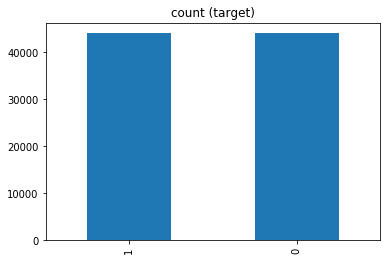

In [5]:
#Separating both classes:
class_0 = df[df['loan_status'] == 0]
class_1 = df[df['loan_status'] == 1]

class_count_0, class_count_1 = df['loan_status'].value_counts()
print("Count of 0:",class_count_0) 
print("Count of 1:",class_count_1)

#Under Sampling:
class_0_under = class_0.sample(class_count_1)
dfu = pd.concat([class_0_under, class_1], axis=0)

print(dfu['loan_status'].value_counts())
#Plot the count after under-sampling:
dfu['loan_status'].value_counts().plot(kind='bar', title='count (target)')

In [6]:
#So our new dataset after under sampling:
dfu.reset_index(inplace=True)
dfu = dfu.drop(["index"],axis=1)
print(dfu.shape)
dfu.head()

(88128, 41)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,2000,2000,2000.0,36,9.76,B,B3,5.0,OWN,60000.0,Not Verified,n,NaN,debt_consolidation,662,KS,7.96,1.0,0.0,4.0,39.0,10.0,2.0,7812.0,19.6,26.0,w,15.19,0.0,0.0,0.0,0.0,65.0,INDIVIDUAL,NaN,4.0,0.0,0.0,12619.0,39900.0,0
1,25000,25000,25000.0,60,8.18,B,B1,10.0,MORTGAGE,85000.0,Verified,n,NaN,debt_consolidation,780,TX,17.11,0.0,0.0,NaN,NaN,7.0,0.0,29558.0,55.1,25.0,w,1716.58,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,48.0,0.0,0.0,180920.0,53600.0,0
2,10000,10000,10000.0,60,15.61,D,D1,8.0,MORTGAGE,85000.0,Verified,n,NaN,debt_consolidation,19,MA,16.96,1.0,1.0,22.0,NaN,14.0,0.0,8848.0,48.3,41.0,w,261.38,0.0,0.0,0.0,0.0,33.0,INDIVIDUAL,NaN,17.0,0.0,0.0,109941.0,18300.0,0
3,7500,7500,7500.0,36,13.11,B,B4,1.0,RENT,30000.0,Not Verified,n,> I have three credit cards with large balance...,debt_consolidation,28,RI,26.96,1.0,0.0,13.0,NaN,12.0,0.0,8094.0,60.4,18.0,f,1608.45,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,152.0,0.0,0.0,30079.0,13400.0,0
4,8000,8000,8000.0,36,13.33,C,C3,8.0,RENT,63000.0,Verified,n,NaN,debt_consolidation,10,MA,16.77,0.0,2.0,NaN,NaN,17.0,0.0,22235.0,51.0,18.0,w,337.33,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,17.0,0.0,0.0,33274.0,42700.0,0


In [7]:
#Checking for null values, it shows percerntage of null values in that column:
null = dfu.isnull().sum()
null_per = (null/len(dfu))*100
null_per

loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_length                      4.450345
home_ownership                  0.000000
annual_inc                      0.001135
verification_status             0.000000
pymnt_plan                      0.000000
desc                           78.418891
purpose                         0.000000
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.002269
inq_last_6mths                  0.002269
mths_since_last_delinq         52.778912
mths_since_last_record         85.279366
open_acc                        0.002269
pub_rec                         0.002269
revol_bal                       0.000000
revol_util      

In [8]:
#Deleting the 4 columns having more than 75% missing values:
dfu.drop(["desc","mths_since_last_record","mths_since_last_major_derog","verification_status_joint"],axis=1,inplace=True)
print(dfu.shape)

(88128, 37)


In [19]:
#Analysing the remaining columns from our dataset:
pd.set_option('display.float_format', '{:.5f}'.format)
des = dfu.describe()
print(des)

        loan_amnt  funded_amnt  funded_amnt_inv        term    int_rate  \
count 88128.00000  88128.00000      88128.00000 88128.00000 88128.00000   
mean  14260.16334  14235.71566      14173.20913    42.31645    13.26551   
std    8329.47672   8319.90822       8339.24752    10.56875     4.34414   
min     500.00000    500.00000          0.00000    36.00000     5.32000   
25%    8000.00000   8000.00000       8000.00000    36.00000     9.99000   
50%   12000.00000  12000.00000      12000.00000    36.00000    13.05000   
75%   20000.00000  20000.00000      19950.00000    60.00000    15.99000   
max   35000.00000  35000.00000      35000.00000    60.00000    28.99000   

       emp_length    annual_inc    zip_code         dti  delinq_2yrs  \
count 84203.00000   88127.00000 88128.00000 88128.00000  88126.00000   
mean      5.93513   74620.17861   516.61120    17.43060      0.28970   
std       3.65402   59627.08038   316.27015     8.16396      0.81076   
min       0.00000    1896.00000    1

In [ ]:
#Below variables are also having more than 50% values as "0" but we can't delete all of them as they may be significant or not:

#"delinq_2yrs", "inq_last_6mths", "pub_rec", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt"

In [9]:
#Now checking Mutlicollinearity between variables and removing it using PCA.
#Before applying PCA, MVT and Outlier treatment is required to be performed.

#Selecting numerical variables for outlier detection:
df1 = dfu._get_numeric_data()
df1.drop(['loan_status'], axis=1, inplace=True)
print(df1.shape)
df1.head()

(88128, 27)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,2000,2000,2000.0,36,9.76,5.0,60000.0,662,7.96,1.0,0.0,4.0,10.0,2.0,7812.0,19.6,26.0,15.19,0.0,0.0,0.0,0.0,4.0,0.0,0.0,12619.0,39900.0
1,25000,25000,25000.0,60,8.18,10.0,85000.0,780,17.11,0.0,0.0,NaN,7.0,0.0,29558.0,55.1,25.0,1716.58,0.0,0.0,0.0,0.0,48.0,0.0,0.0,180920.0,53600.0
2,10000,10000,10000.0,60,15.61,8.0,85000.0,19,16.96,1.0,1.0,22.0,14.0,0.0,8848.0,48.3,41.0,261.38,0.0,0.0,0.0,0.0,17.0,0.0,0.0,109941.0,18300.0
3,7500,7500,7500.0,36,13.11,1.0,30000.0,28,26.96,1.0,0.0,13.0,12.0,0.0,8094.0,60.4,18.0,1608.45,0.0,0.0,0.0,0.0,152.0,0.0,0.0,30079.0,13400.0
4,8000,8000,8000.0,36,13.33,8.0,63000.0,10,16.77,0.0,2.0,NaN,17.0,0.0,22235.0,51.0,18.0,337.33,0.0,0.0,0.0,0.0,17.0,0.0,0.0,33274.0,42700.0


In [10]:
#Now checking for skewness for all numeric variables before outlier treatment
#For no skewness, it should range from -1 to +1:

skewness1 = df1.skew()
skewness1

loan_amnt                      0.750185
funded_amnt                    0.754532
funded_amnt_inv                0.751445
term                           1.081621
int_rate                       0.412438
emp_length                    -0.218453
annual_inc                    20.254628
zip_code                       0.029840
dti                            0.248156
delinq_2yrs                    5.372917
inq_last_6mths                 2.256931
mths_since_last_delinq         0.435145
open_acc                       1.168463
pub_rec                        5.884646
revol_bal                     13.752860
revol_util                    -0.160311
total_acc                      0.826595
total_rec_int                  2.759856
total_rec_late_fee            18.312794
recoveries                    21.018076
collection_recovery_fee       35.717043
collections_12_mths_ex_med    11.815232
last_week_pay                  0.857612
acc_now_delinq                18.982980
tot_coll_amt                  58.488334


In [11]:
#Outlier Detection:

#Getting details of each variable:
des1 = df1.describe().round().T
#Setting upper and lower limit:
Q1 = df1.quantile(0.5)
Q3 = df1.quantile(0.95)
IQR = Q3-Q1
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
#Checking for outliers:
outlier = np.where((df1<lower_limit)|(df1>upper_limit))
#Additional parameters:
des2 = pd.DataFrame({"IQR":IQR, "LL":lower_limit, "UL":upper_limit, "Skewness":skewness1})
#Creating outlier frame for further analysis:
outlier_frame = pd.concat([des1,des2],axis=1)
outlier_frame

,count,mean,std,min,25%,50%,75%,max,IQR,LL,UL,Skewness
loan_amnt,88128.0,14239.0,8341.0,500.0,8000.0,12000.0,20000.0,35000.0,19000.0000,-16500.00000,59500.00000,0.750185
funded_amnt,88128.0,14214.0,8331.0,500.0,8000.0,12000.0,20000.0,35000.0,18800.0000,-16200.00000,59000.00000,0.754532
funded_amnt_inv,88128.0,14151.0,8351.0,0.0,8000.0,12000.0,19950.0,35000.0,18750.0000,-16125.00000,58875.00000,0.751445
term,88128.0,42.0,11.0,36.0,36.0,36.0,60.0,60.0,24.0000,0.00000,96.00000,1.081621
int_rate,88128.0,13.0,4.0,5.0,10.0,13.0,16.0,29.0,8.0000,0.99000,32.99000,0.412438
emp_length,84206.0,6.0,4.0,0.0,3.0,6.0,10.0,10.0,4.0000,0.00000,16.00000,-0.218453
annual_inc,88127.0,74463.0,54330.0,1896.0,45000.0,64000.0,90000.0,6000000.0,86000.0000,-65000.00000,279000.00000,20.254628
zip_code,88128.0,517.0,316.0,10.0,226.0,481.0,825.0,999.0,476.0000,-233.00000,1671.00000,0.029840
dti,88128.0,17.0,8.0,0.0,11.0,17.0,23.0,59.0,14.7765,-5.13475,53.97125,0.248156
delinq_2yrs,88126.0,0.0,1.0,0.0,0.0,0.0,0.0,26.0,2.0000,-3.00000,5.00000,5.372917


In [12]:
#Selecting the desired columns for capping and flooring:
X1 = df1.loc[:,["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt"]]

'''Capping: replacing all values higher than upper limit will be replaced by upper limit itself'''
up = upper_limit[["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt"]]                     #To cap some required values
X11 = np.where(X1>up, up, X1)

'''Flooring means replacing all values less than lower limit will be replaced by lower limit itself'''
#But in our dataset no values are lower than lower limit, so no need of flooring
#X11 = np.where(X1<low, low, X1)

#Converting X11 into a dataframe:
X11 = pd.DataFrame(X11)
#Renaming columns of dataframe "X11":
X11.columns = ["annual_inc", "pub_rec", "revol_bal", "tot_coll_amt" ]

#If capping and flooring all variables:
#up = upper_limit 
#low = lower_limit     
#X11.columns = X1.columns.values

#Updating values in dataframe after outlier detection:
df1.update(X11)

#Checking for skewness after doing outlier detection:
skewness = df1.skew()
print(skewness)

#Note:
#As we can see even after outlier detection, there are variables having large skewness values
#This is because these variables are having Upper Limit(UL) as "0" because 50% values are zero in these variables
#And if we replace these values with UL then these variables will have almost all values as "0".

print("Outlier Detection Done")

loan_amnt                      0.750185
funded_amnt                    0.754532
funded_amnt_inv                0.751445
term                           1.081621
int_rate                       0.412438
emp_length                    -0.218453
annual_inc                     1.937134
zip_code                       0.029840
dti                            0.248156
delinq_2yrs                    5.372917
inq_last_6mths                 2.256931
mths_since_last_delinq         0.435145
open_acc                       1.168463
pub_rec                        2.812960
revol_bal                      2.389586
revol_util                    -0.160311
total_acc                      0.826595
total_rec_int                  2.759856
total_rec_late_fee            18.312794
recoveries                    21.018076
collection_recovery_fee       35.717043
collections_12_mths_ex_med    11.815232
last_week_pay                  0.857612
acc_now_delinq                18.982980
tot_coll_amt                   4.116495


In [13]:
'''Missing Value Treatment:'''

#Checking mssing values in each column:
print(df1.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
emp_length                     3922
annual_inc                        1
zip_code                          0
dti                               0
delinq_2yrs                       2
inq_last_6mths                    2
mths_since_last_delinq        46513
open_acc                          2
pub_rec                           2
revol_bal                         0
revol_util                       46
total_acc                         2
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
collections_12_mths_ex_med       24
last_week_pay                  1101
acc_now_delinq                    2
tot_coll_amt                  12578
tot_cur_bal                   12578
total_rev_hi_lim              12578
dtype: int64


In [14]:
#Replacing missing values using Imputer:

from sklearn.impute import SimpleImputer
import numpy as np
#Columns  are having skewness, so we will use "median" as imputer:
impute = SimpleImputer(missing_values=np.nan, strategy="median")
df1.loc[:,["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]] = impute.fit_transform(df1.loc[:,["annual_inc", "delinq_2yrs", "inq_last_6mths", "open_acc", "pub_rec", "collections_12_mths_ex_med", "acc_now_delinq", "tot_coll_amt", "tot_cur_bal", "total_rev_hi_lim"]])
#Columns  are having no skewness, so we will use "mean" as imputer:
impute = SimpleImputer(missing_values=np.nan, strategy="mean")
df1.loc[:,["emp_length", "revol_util", "total_acc", "last_week_pay","mths_since_last_delinq"]] = impute.fit_transform(df1.loc[:,["emp_length", "revol_util", "total_acc", "last_week_pay","mths_since_last_delinq"]])

In [15]:
#Now again checking missing values in each column after MVT:
print("No. of Null values in dataset after MVT:",df1.isnull().sum().sum())
print("Missing Value Treatment Done")

No. of Null values in dataset after MVT: 0
Missing Value Treatment Done


In [ ]:
'''*******************************************************************************
             Checking Multi-colinearity and Using PCA for removing it
*******************************************************************************'''

In [16]:
#Standard scaling before doing PCA:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df11 = sc.fit_transform(df1)
df11 = pd.DataFrame(df11)
print(df11.shape)
df11.head()

(88128, 27)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,-1.467387,-1.466155,-1.455122,-0.596066,-0.806621,-0.268201,-0.322374,0.460129,-1.163576,0.878016,-0.713649,-2.014930,-0.260236,4.147753,-0.534754,-1.437769,0.061483,-0.865580,-0.092665,-0.09042,-0.063421,-0.09595,-1.275923,-0.062092,-0.258987,-0.838557,0.319347
1,1.290158,1.294662,1.299175,1.677668,-1.171078,1.134976,0.276707,0.833387,-0.042219,-0.357400,-0.713649,0.000000,-0.840560,-0.383168,0.931819,0.029873,-0.023447,-0.043368,-0.092665,-0.09042,-0.063421,-0.09595,-0.359718,-0.062092,-0.258987,0.332125,0.782858
2,-0.508241,-0.505871,-0.497106,1.677668,0.542792,0.573705,0.276707,-1.573808,-0.060602,0.878016,0.235986,-0.821082,0.513531,-0.383168,-0.464885,-0.251253,1.335433,-0.746607,-0.092665,-0.09042,-0.063421,-0.09595,-1.005226,-0.062092,-0.258987,-0.161597,-0.411443
3,-0.807974,-0.805960,-0.796486,-0.596066,-0.033880,-1.390742,-1.041270,-1.545339,1.164924,0.878016,-0.713649,-1.418006,0.126648,-0.383168,-0.515735,0.248985,-0.617957,-0.095623,-0.092665,-0.09042,-0.063421,-0.09595,1.805855,-0.062092,-0.258987,-0.717107,-0.577225
4,-0.748027,-0.745942,-0.736610,-0.596066,0.016867,0.573705,-0.250484,-1.602277,-0.083887,-0.357400,1.185622,0.000000,1.093855,-0.383168,0.437948,-0.139630,-0.617957,-0.709903,-0.092665,-0.09042,-0.063421,-0.09595,-1.005226,-0.062092,-0.258987,-0.694883,0.414079


In [17]:
#Renaming columns:
df11.columns=df1.columns.values
df11.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-1.467387,-1.466155,-1.455122,-0.596066,-0.806621,-0.268201,-0.322374,0.460129,-1.163576,0.878016,-0.713649,-2.014930,-0.260236,4.147753,-0.534754,-1.437769,0.061483,-0.865580,-0.092665,-0.09042,-0.063421,-0.09595,-1.275923,-0.062092,-0.258987,-0.838557,0.319347
1,1.290158,1.294662,1.299175,1.677668,-1.171078,1.134976,0.276707,0.833387,-0.042219,-0.357400,-0.713649,0.000000,-0.840560,-0.383168,0.931819,0.029873,-0.023447,-0.043368,-0.092665,-0.09042,-0.063421,-0.09595,-0.359718,-0.062092,-0.258987,0.332125,0.782858
2,-0.508241,-0.505871,-0.497106,1.677668,0.542792,0.573705,0.276707,-1.573808,-0.060602,0.878016,0.235986,-0.821082,0.513531,-0.383168,-0.464885,-0.251253,1.335433,-0.746607,-0.092665,-0.09042,-0.063421,-0.09595,-1.005226,-0.062092,-0.258987,-0.161597,-0.411443
3,-0.807974,-0.805960,-0.796486,-0.596066,-0.033880,-1.390742,-1.041270,-1.545339,1.164924,0.878016,-0.713649,-1.418006,0.126648,-0.383168,-0.515735,0.248985,-0.617957,-0.095623,-0.092665,-0.09042,-0.063421,-0.09595,1.805855,-0.062092,-0.258987,-0.717107,-0.577225
4,-0.748027,-0.745942,-0.736610,-0.596066,0.016867,0.573705,-0.250484,-1.602277,-0.083887,-0.357400,1.185622,0.000000,1.093855,-0.383168,0.437948,-0.139630,-0.617957,-0.709903,-0.092665,-0.09042,-0.063421,-0.09595,-1.005226,-0.062092,-0.258987,-0.694883,0.414079


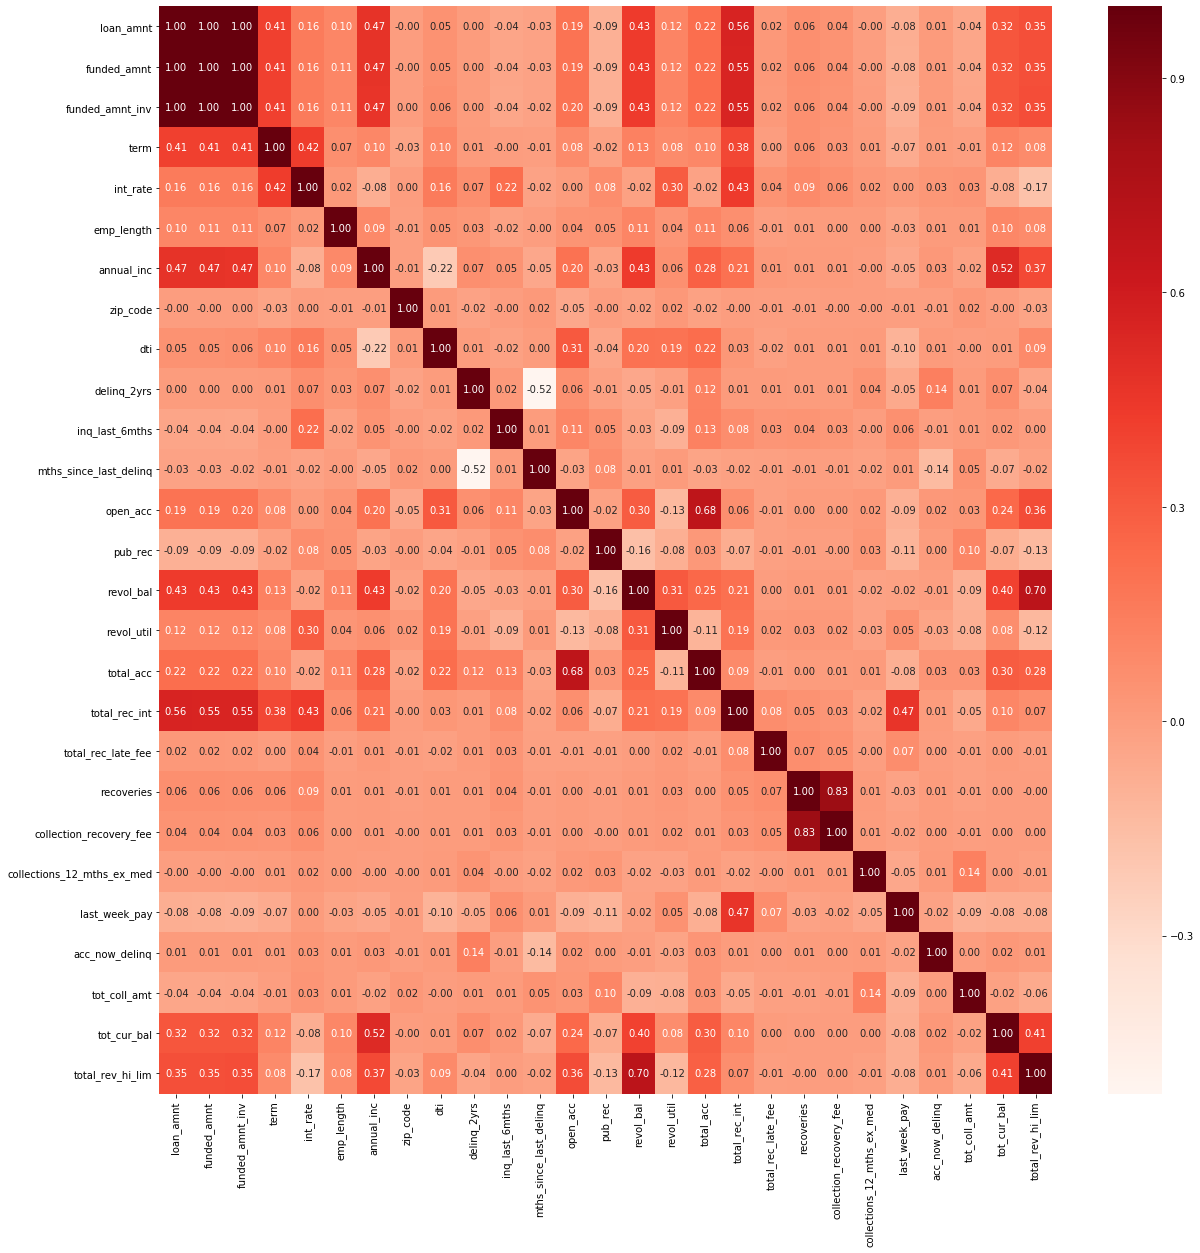

In [31]:
#Ploting multicolinearity between all columns:

import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sb.heatmap(df11.corr(), annot=True, cmap= plt.cm.Reds, fmt='.2f')
plt.show()

In [18]:
#In our model we want to replace all the variables having mulit-colinearity into one vaiable,
#so we don't require elbow method and can do in on step as shown below
'''
#Below columns are having high multi-collinearity between them:
["loan_amnt", "funded_amnt", "funded_amnt_inv"]
["recoveries", "collection_recovery_fee"]
'''

#Now applying PCA on ["loan_amnt", "funded_amnt", "funded_amnt_inv"]:
from sklearn.decomposition.pca import PCA
X = df11.loc[:,["loan_amnt", "funded_amnt", "funded_amnt_inv"]]
df11.drop(["loan_amnt", "funded_amnt", "funded_amnt_inv"], axis=1, inplace=True)
pca = PCA(n_components=1)
X1 = pd.DataFrame(pca.fit_transform(X))
df11["new1"] = X1[0]
pd.options.display.float_format = '{:.2f}'.format
print(df11.shape)
df11.head()

(88128, 25)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1
0,-0.60,-0.81,-0.27,-0.32,0.46,-1.16,0.88,-0.71,-2.01,-0.26,4.15,-0.53,-1.44,0.06,-0.87,-0.09,-0.09,-0.06,-0.10,-1.28,-0.06,-0.26,-0.84,0.32,-2.53
1,1.68,-1.17,1.13,0.28,0.83,-0.04,-0.36,-0.71,0.00,-0.84,-0.38,0.93,0.03,-0.02,-0.04,-0.09,-0.09,-0.06,-0.10,-0.36,-0.06,-0.26,0.33,0.78,2.24
2,1.68,0.54,0.57,0.28,-1.57,-0.06,0.88,0.24,-0.82,0.51,-0.38,-0.46,-0.25,1.34,-0.75,-0.09,-0.09,-0.06,-0.10,-1.01,-0.06,-0.26,-0.16,-0.41,-0.87
3,-0.60,-0.03,-1.39,-1.04,-1.55,1.16,0.88,-0.71,-1.42,0.13,-0.38,-0.52,0.25,-0.62,-0.10,-0.09,-0.09,-0.06,-0.10,1.81,-0.06,-0.26,-0.72,-0.58,-1.39
4,-0.60,0.02,0.57,-0.25,-1.60,-0.08,-0.36,1.19,0.00,1.09,-0.38,0.44,-0.14,-0.62,-0.71,-0.09,-0.09,-0.06,-0.10,-1.01,-0.06,-0.26,-0.69,0.41,-1.29


In [19]:
#Now applying PCA on ["recoveries", "collection_recovery_fee"]:
from sklearn.decomposition.pca import PCA
X = df11.loc[:,["recoveries", "collection_recovery_fee"]]
df11.drop(["recoveries", "collection_recovery_fee"], axis=1, inplace=True)
pca = PCA(n_components=1)
X1 = pd.DataFrame(pca.fit_transform(X))
df11["new3"] = X1[0]
pd.options.display.float_format = '{:.2f}'.format
print(df11.shape)
df11.head()

(88128, 24)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1,new3
0,-0.60,-0.81,-0.27,-0.32,0.46,-1.16,0.88,-0.71,-2.01,-0.26,4.15,-0.53,-1.44,0.06,-0.87,-0.09,-0.10,-1.28,-0.06,-0.26,-0.84,0.32,-2.53,-0.11
1,1.68,-1.17,1.13,0.28,0.83,-0.04,-0.36,-0.71,0.00,-0.84,-0.38,0.93,0.03,-0.02,-0.04,-0.09,-0.10,-0.36,-0.06,-0.26,0.33,0.78,2.24,-0.11
2,1.68,0.54,0.57,0.28,-1.57,-0.06,0.88,0.24,-0.82,0.51,-0.38,-0.46,-0.25,1.34,-0.75,-0.09,-0.10,-1.01,-0.06,-0.26,-0.16,-0.41,-0.87,-0.11
3,-0.60,-0.03,-1.39,-1.04,-1.55,1.16,0.88,-0.71,-1.42,0.13,-0.38,-0.52,0.25,-0.62,-0.10,-0.09,-0.10,1.81,-0.06,-0.26,-0.72,-0.58,-1.39,-0.11
4,-0.60,0.02,0.57,-0.25,-1.60,-0.08,-0.36,1.19,0.00,1.09,-0.38,0.44,-0.14,-0.62,-0.71,-0.09,-0.10,-1.01,-0.06,-0.26,-0.69,0.41,-1.29,-0.11


In [20]:
#Now checking multicolinearity for categorical variables:

df2 = dfu.select_dtypes(include=["object"])
print(df2.shape)
df2.head()

(88128, 9)


,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,initial_list_status,application_type
0,B,B3,OWN,Not Verified,n,debt_consolidation,KS,w,INDIVIDUAL
1,B,B1,MORTGAGE,Verified,n,debt_consolidation,TX,w,INDIVIDUAL
2,D,D1,MORTGAGE,Verified,n,debt_consolidation,MA,w,INDIVIDUAL
3,B,B4,RENT,Not Verified,n,debt_consolidation,RI,f,INDIVIDUAL
4,C,C3,RENT,Verified,n,debt_consolidation,MA,w,INDIVIDUAL


In [21]:
#Checking Missing values in categorical columns:
print(df2.isnull().sum())

#No missing values

grade                  0
sub_grade              0
home_ownership         0
verification_status    0
pymnt_plan             0
purpose                0
addr_state             0
initial_list_status    0
application_type       0
dtype: int64


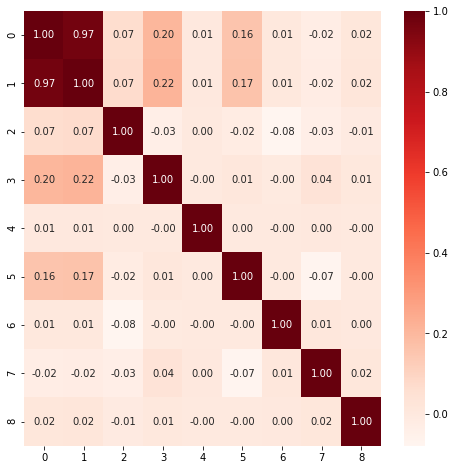

In [39]:
#Using "Spearman rank correlation coefficient" for categorical variables:
from scipy import stats
cor, p = stats.spearmanr(df2) 
#"corr" is correlation and "p" is p-value

#Ploting coefficients to check multi-colinearity: 
plt.figure(figsize=(8,8))
sb.heatmap(cor, annot=True, cmap= plt.cm.Reds, fmt='.2f')
plt.show()

#No categorical variable is having Mutli-colinearity

In [22]:
#"grade" and "sub-grade" are having multi-collineairty because they will show same information i.e postion of customer, 
#So we will drop "grade" and take forward only "sub-grade" in our model.

df2.drop(["grade"],axis=1,inplace=True)

In [23]:
#Checking number of categories/classes in each categorical variable:
for i in df2.columns:
    print(i,":",len(df2[i].unique()))

sub_grade : 35
home_ownership : 6
verification_status : 2
pymnt_plan : 2
purpose : 14
addr_state : 51
initial_list_status : 2
application_type : 2


In [24]:
#Combining low frequency classes into one named as "other":
#(series/series.sum()*100) gives percentage of each class
#.lt(1) means less than 1 (It means columns having mask<1, will become True and rest will become False)

#Only taking categories with count almost 1000 or more and rest combined in "Other"
series = pd.value_counts(df2["addr_state"])
mask = (series/series.sum()*100).lt(1.51)    
df2["addr_state"] = np.where(df2["addr_state"].isin(series[mask].index),"Other",df2["addr_state"])
#Now all categories having low frequency are combined in "Other":
print(df2["addr_state"].value_counts().sort_values(ascending=False))

Other    16780
CA       13627
NY        7313
TX        7070
FL        5883
IL        3430
NJ        3376
PA        3061
OH        2947
GA        2874
VA        2584
NC        2440
MI        2164
MA        2156
AZ        2125
MD        2087
WA        1972
CO        1889
MN        1590
MO        1414
CT        1346
Name: addr_state, dtype: int64


In [25]:
#Combining low frequency classes into one named as "other":
#(series/series.sum()*100) gives percentage of each class
#.lt(1) means less than 1 (It means columns having mask<1, will become True and rest will become False)

#Only taking categories with count almost 1000 or more and rest combined in "Other"
series = pd.value_counts(df2["sub_grade"])
mask = (series/series.sum()*100).lt(2.1)    
df2["sub_grade"] = np.where(df2["sub_grade"].isin(series[mask].index),"Other",df2["sub_grade"])
#Now all categories having low frequency are combined in "Other":
print(df2["sub_grade"].value_counts().sort_values(ascending=False))

Other    9191
B3       5927
B4       5701
C1       5268
C2       5115
B2       5091
B5       4993
C3       4889
C4       4535
A5       4495
B1       4441
C5       3857
A4       3739
D1       3553
D2       3063
A3       2557
D3       2534
D4       2499
A2       2348
A1       2313
D5       2019
Name: sub_grade, dtype: int64


In [26]:
#Now checking:
for i in df2.columns:
    print(i,":",len(df2[i].unique()))
    
print(pd.get_dummies(df2,drop_first=True).shape)

sub_grade : 21
home_ownership : 6
verification_status : 2
pymnt_plan : 2
purpose : 14
addr_state : 21
initial_list_status : 2
application_type : 2
(88128, 62)


In [30]:
'''3. Using pd.get_dummies'''
cat_vars = list(df2.columns)
for var in cat_vars:    
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df2[var], prefix=var)
    df3=df2.join(cat_list)
    df2=df3
    
df_vars = df2.columns.values.tolist()
to_keep = [i for i in df_vars if i not in cat_vars]

df22 = df2[to_keep]
print(df22.shape)
df22.head()

(88128, 70)


,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_Other,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NY,addr_state_OH,addr_state_Other,addr_state_PA,addr_state_TX,addr_state_VA,addr_state_WA,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [31]:
#Removing dummy variable trap:
df22.drop(["sub_grade_A1","home_ownership_ANY","purpose_car","addr_state_AZ"],axis=1,inplace=True)
print(df22.shape)

(88128, 66)


In [32]:
#Now concatenating numerical and continuous variables::

X = pd.concat([df11,df22],axis=1)
Y = dfu[['loan_status']]
dfne = pd.concat([X,Y],axis=1)
dfn = dfne
print(dfn.shape)
dfn.head()

(88128, 91)


,term,int_rate,emp_length,annual_inc,zip_code,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,new1,new3,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_Other,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_FL,addr_state_GA,addr_state_IL,addr_state_MA,addr_state_MD,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_NC,addr_state_NJ,addr_state_NY,addr_state_OH,addr_state_Other,addr_state_PA,addr_state_TX,addr_state_VA,addr_state_WA,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,loan_status
0,-0.60,-0.81,-0.27,-0.32,0.46,-1.16,0.88,-0.71,-2.01,-0.26,4.15,-0.53,-1.44,0.06,-0.87,-0.09,-0.10,-1.28,-0.06,-0.26,-0.84,0.32,-2.53,-0.11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
1,1.68,-1.17,1.13,0.28,0.83,-0.04,-0.36,-0.71,0.00,-0.84,-0.38,0.93,0.03,-0.02,-0.04,-0.09,-0.10,-0.36,-0.06,-0.26,0.33,0.78,2.24,-0.11,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,1.68,0.54,0.57,0.28,-1.57,-0.06,0.88,0.24,-0.82,0.51,-0.38,-0.46,-0.25,1.34,-0.75,-0.09,-0.10,-1.01,-0.06,-0.26,-0.16,-0.41,-0.87,-0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,-0.60,-0.03,-1.39,-1.04,-1.55,1.16,0.88,-0.71,-1.42,0.13,-0.38,-0.52,0.25,-0.62,-0.10,-0.09,-0.10,1.81,-0.06,-0.26,-0.72,-0.58,-1.39,-0.11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4,-0.60,0.02,0.57,-0.25,-1.60,-0.08,-0.36,1.19,0.00,1.09,-0.38,0.44,-0.14,-0.62,-0.71,-0.09,-0.10,-1.01,-0.06,-0.26,-0.69,0.41,-1.29,-0.11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [33]:
'''4.Checking for duplicates'''
df_duplicate = pd.DataFrame(df)[df.duplicated()]
print(df_duplicate.head())
print("No duplicates found")

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, pymnt_plan, desc, purpose, zip_code, addr_state, dti, delinq_2yrs, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, collections_12_mths_ex_med, mths_since_last_major_derog, application_type, verification_status_joint, last_week_pay, acc_now_delinq, tot_coll_amt, tot_cur_bal, total_rev_hi_lim, loan_status]
Index: []
No duplicates found


In [34]:
#Seperating X & Y variables:
X = dfn.iloc[:,:-1]
Y = dfn.iloc[:,-1]

last_week_pay           0.07
int_rate                0.05
dti                     0.04
tot_cur_bal             0.04
initial_list_status_f   0.04
total_rec_int           0.04
total_rev_hi_lim        0.04
new1                    0.03
revol_util              0.03
total_acc               0.03
dtype: float64


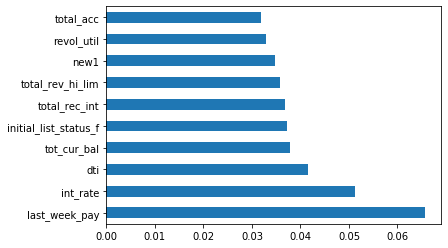

In [45]:
'''Feature Selection'''
#####1.using Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
#use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.nlargest(10))
#plot graph of feature importances for better visualization
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [47]:
'''best 10 significant variables using TreeClassifier:
batch_enrolled, int_rate, annual_inc, dti, revol_util, total_acc, total_rec_int, last_week_pay, tot_cur_bal, total_rev_hi_lim'''
X_n = X.loc[:,["total_acc","revol_util","new1","total_rev_hi_lim","total_rec_int","initial_list_status_f","dti","tot_cur_bal","int_rate","last_week_pay"]]
X_n.head()

,total_acc,revol_util,new1,total_rev_hi_lim,total_rec_int,initial_list_status_f,dti,tot_cur_bal,int_rate,last_week_pay
0,0.06,-1.44,-2.53,0.32,-0.87,0,-1.16,-0.84,-0.81,-1.28
1,-0.02,0.03,2.24,0.78,-0.04,0,-0.04,0.33,-1.17,-0.36
2,1.34,-0.25,-0.87,-0.41,-0.75,0,-0.06,-0.16,0.54,-1.01
3,-0.62,0.25,-1.39,-0.58,-0.10,1,1.16,-0.72,-0.03,1.81
4,-0.62,-0.14,-1.29,0.41,-0.71,0,-0.08,-0.69,0.02,-1.01


In [ ]:
'''
*******************************************************************************************************************
*******************************************************************************************************************

        Creating models with six different ML algorithms with their optimal parameters
            
*******************************************************************************************************************
*******************************************************************************************************************
'''

In [48]:
#Split train and test data:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y, test_size=0.20, random_state=0)

In [51]:
'''GradientBoosting'''

from sklearn.ensemble import GradientBoostingClassifier
#Selecting the optimal parameters values using GridSearchCV:
model = GradientBoostingClassifier(min_samples_leaf=50, min_samples_split=10, n_estimators=500)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = model.score(X_test, Y_test)
print("Score for GB:",score)

Score for GB: 0.7804947237036196


accuracy: 0.7804947237036196
error rate: 0.21950527629638034
sensitivity: 0.719168071950534
specificity: 0.8429733134807009
precision: 0.8235066941297632


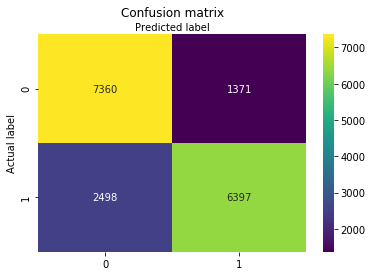

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

'''The Confusion matrix in the heatmap form for all combinations'''
fig, ax = plt.subplots()
sb.heatmap(pd.DataFrame(cm), annot=True, cmap="viridis",fmt='2g' )
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("accuracy:", (TP+TN)/(TP+TN+FP+FN))
print("error rate:", (FP+FN)/(TP+TN+FP+FN))
print("sensitivity:", (TP)/(TP+FN))
print("specificity:", (TN)/(TN+FP))
print("precision:", (TP)/(TP+FP))

#Getting accuracy of 85.19% using random forest